https://huggingface.co/blog/smolagents

smolagents supports these llm integration:
- "hf_api", 
- "transformers", 
- "ollama", 
- "litellm"

see details in https://github.com/huggingface/smolagents/blob/main/examples/agent_from_any_llm.py


# litellm installation

Has been started with

```bash
cd ~/git
# Get the code
git clone https://github.com/BerriAI/litellm

# Go to folder
cd litellm

# Add the master key - you can change this after setup
echo 'LITELLM_MASTER_KEY="<to be changed>"' > .env

# Add the litellm salt key - you cannot change this after adding a model
# It is used to encrypt / decrypt your LLM API Key credentials
# We recommned - https://1password.com/password-generator/ 
# password generator to get a random hash for litellm salt key
echo 'LITELLM_SALT_KEY="<to be changed>"' >> .env

source .env

# Start
docker compose up
```

And then it is a matter of creating a key, and then a model (proxy)

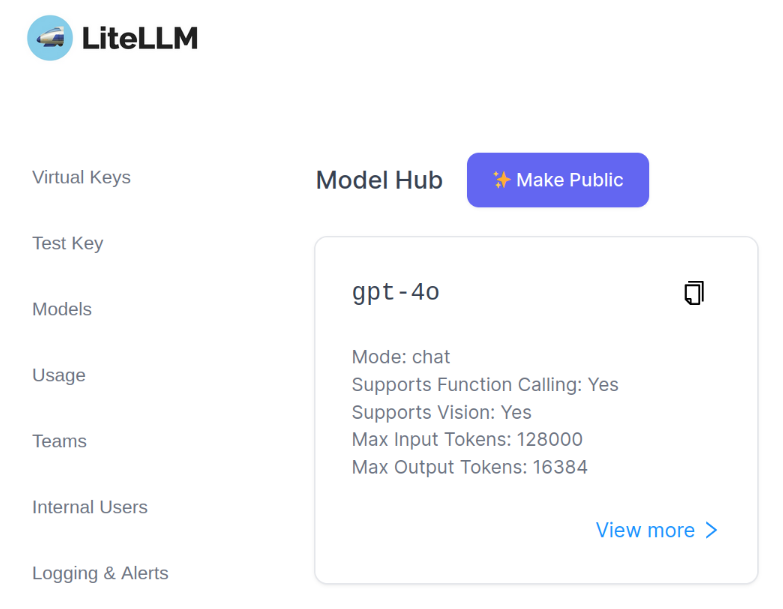

# litellm apikey

In [ ]:
from config import load_env
import os

load_env()
apikey = os.getenv("LITELLM_API_KEY")

# this tests litemml integration

In [ ]:
import openai

client = openai.OpenAI(
    api_key=apikey,
    base_url="http://0.0.0.0:4000",  # LiteLLM Proxy is OpenAI compatible, Read More: https://docs.litellm.ai/docs/proxy/user_keys
)

response = client.chat.completions.create(
    model="gpt-4o",  # model to send to the proxy
    messages=[
        {"role": "user", "content": "this is a test request, write a short poem"}
    ],
)

print(response)

ChatCompletion(id='chatcmpl-B5J4wacd4aQCH5czE9g2PCY3ujL3J', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="In the quiet morn's embrace,  \nDew-kissed fields begin to wake,  \nWhispers of a sunlit grace,  \nDance upon the silver lake.  \n\nPetals nod in gentle breeze,  \nNature's song, a soft refrain,  \nTime slows down in moments, seized,  \nLife's sweet music, free of strain.  \n\nUnderneath the vast expanse,  \nStars await the night's debut,  \nIn this world, we take our chance,  \nFind the magic, pure and true.  ", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1740604678, model='gpt-4o-2024-08-06', object='chat.completion', service_tier=None, system_fingerprint='fp_b705f0c291', usage=CompletionUsage(completion_tokens=104, prompt_tokens=17, total_tokens=121, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_pred

# smolagents w/ DuckDuckGoSearchTool

In [ ]:
from smolagents import LiteLLMModel

model = LiteLLMModel(model_id="gpt-4o", api_key=apikey, base_url="http://0.0.0.0:4000")

In [ ]:
from smolagents import CodeAgent, DuckDuckGoSearchTool

agent = CodeAgent(tools=[DuckDuckGoSearchTool()], model=model)

agent.run(
    "How many seconds would it take for a leopard at full speed to run through Pont des Arts?"
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ How many seconds would it take for a leopard at full speed to run through Pont des Arts?                        │
│                                                                                                                 │
╰─ LiteLLMModel - gpt-4o ─────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  bridge_length_query = web_search(query="Pont des Arts length")                                                   
  print(bridge_length_query)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[Pont des Arts - Wikipedia](https://en.wikipedia.org/wiki/Pont_des_Arts)
The Pont des Arts (French pronunciation: [pɔ̃ dez‿aʁ]) or Passerelle des Arts ([pasʁɛl-]) is a pedestrian bridge in
Paris which crosses the River Seine. It links the Institut de France and the central square ( cour carrée ) of the 
Palais du Louvre , (which had been termed the "Palais des Arts" under the First French Empire ).

[10 Picturesque Facts About The Pont Des Arts](https://art-facts.com/pont-des-arts-facts/)
The Pont des Arts literally translates to ... Even though the bridge doesn't look that big at first sight, it still
has a length of 155 meters (509 feet) and a width of 11 meters (36 feet). The original bridge during the 1880s / 
Wiki Commons 4. The bridge was completely rebuilt in the early 1980s.

[7 Beautiful BRIDGES in Paris (You Have To See!)](https://travelingparis.com/bridges-in-paris/)
Pont des Arts in Paris. The current bridge has an iconic design with seven arches, and it has a total length of 155
meters. Pont des Arts was a film location for various TV series and movies. For example, a scene in the movie Now 
You See Me was filmed on the bridge.

[Love Lock bridge in Paris then & now: The Pont des 
Arts](https://cosmopoliclan.com/travel-with-kids/inspiration/love-lock-bridge-paris-pont-des-arts/)
The Pont des Arts or Passerelle des Arts is the pedestrian bridge over the Seine that connects the Louvre Museum on
the Right bank to the Institut de France on the Left Bank.As a result, it connects the 1st and the 6th Paris 
arrondissements. It is flanked by the Pont du Carrousel downstream and by the Pont-Neuf and the Île de la Cité, 
home to the Notre Dame cathedral, upstream.

[17 Famous Bridges in France: Must-See Wonders! - Salut from 
Paris](https://www.salutfromparis.com/famous-bridges-in-france/)
(construction began in 1578, opened in 1607, 238m length) The Pont Neuf in Paris. Despite its name meaning 'New 
Bridge', Pont Neuf is actually the oldest standing bridge across the Seine in Paris. ... #10 Pont des Arts, Paris 
(initial construction between 1801 and 1804, 155m length)

[Pont des Arts - The Love Bridge](https://www.tourdefrance-bridges.com/post/pont-des-arts-the-love-bridge)
The Pont des Arts was a very light-weight and efficient structure, differing from previous cast iron bridges in the
UK such as the Iron Bridge crossing the river Severn, or Warmouth Bridge, which were both significantly more 
cumbersome. ... The original bridge had 9 arches, was 155m in length and 11m wide and was made using cast iron. The
...

[Pont des Arts Bridge - napoleon.org](https://www.napoleon.org/en/magazine/places/pont-des-arts-bridge/)
des Arts (Palace of the Arts), the bridge was christened the 'Pont de Arts'. As a simple footbridge crossing 
between the right and left banks of the Seine, the bridge was raised above the ground level of the two banks and 
comprised wooden planking resting on nine arches each of a span of 18.5 metres supported by masonry piles.

[History of the Pont des Arts in Paris - Come to 
Paris](https://www.cometoparis.com/paris-guide/paris-monuments/pont-des-arts-s959)
It was the first metal bridge to be built in the city and connects the Quai de Conti at the Institut de France, 
with the Quai des Tuileries, where the Louvre Museum is situated. The history of an icon. The first metal bridge in
Paris was built very early in the 19th century, on the site now occupied by the modern Pont des Arts.

[Learn everything about the history of Pont des Arts in Paris](https://sainte-chapelle.co/pont-des-arts/)
Built-in 1801 and 1804, Pont Des Arts, previously known as Passerelle des Arts, was the first iron bridge in Paris.
Now a pedestrian bridge, it is used by locals and tourists to have a pleasant stroll with friends and family and 
get stunning views of the River Seine.

[Pont des Arts - Romantic bridge over the Seine - CityXee 
Paris](https://paris.cityxee.com/en/pont-des-arts-romantic-brid

[Step 0: Duration 4.41 seconds| Input tokens: 2,030 | Output tokens: 104]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
                                                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 1: Duration 0.30 seconds| Input tokens: 5,292 | Output tokens: 104]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
                                                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: None

[Step 2: Duration 0.52 seconds| Input tokens: 8,616 | Output tokens: 104]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  leopard_speed_query = web_search(query="top speed of a leopard")                                                 
  print(leopard_speed_query)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[How Fast Are Leopards? Top Speeds and How It Compares ... - AZ 
Animals](https://a-z-animals.com/blog/how-fast-leopards-top-speeds-how-compares-other-big-cats/)
Leopards can run up to speeds of 36 miles per hour. Below, we delve into how that speed compares to their fellow 
felines and what contributes to a cat's incredible speed and agility. How Fast Are Leopards Compared to Other Big 
Cats?

[How Fast Can a Leopard Run? It's Slower than Most of Its Prey](https://africafreak.com/how-fast-can-a-leopard-run)
African leopards have a top speed of 56 - 60 km/h (35 - 37 mph). But they can hunt animals that are much faster 
than they are. This article explains it all.

[Unraveling the Speed of Leopards: How Fast Can They Actually 
Run?](https://startingrun.com/unraveling-the-speed-of-leopards-how-fast-can-they-actually-run/)
After understanding the factors that influence a leopard's speed, let's delve into a comparative analysis with 
other big cats. The leopard, famously fast, clocks an impressive top speed of 58 km/h (36 mph). But how does this 
fare against other members of the big cat family? The lion, larger and heavier, reaches a peak speed of 81 km/h (50
mph). Lions possess less agility, but they marshal ...

[How Fast Are Snow Leopards? See Their Top Speeds Compared ... - AZ 
Animals](https://a-z-animals.com/articles/how-fast-are-snow-leopards-see-their-top-speeds-compared-to-other-fast-ca
ts/)
Snow leopards have impressive speed and unrivaled jumping skills. Discover how fast snow leopards run, and how they
compare to other cats.

[Leopard - Facts, Diet, Habitat & Pictures on Animalia.bio](https://animalia.bio/leopard)
The leopard is distinguished by its well-camouflaged fur, opportunistic hunting behavior, broad diet, strength, and
its ability to adapt to a variety of habitats ranging from rainforest to steppe, including arid and montane areas. 
It can run at speeds of up to 58 km/h (36 mph).

[How Fast Can a Leopard Run? A Fascinating Look at Their 
Speed](https://tiger-universe.com/blogs/tiger-blog/how-fast-can-a-leopard-run)
Ever wondered How Fast Can a Leopard Run? Explore the speed, facts, and more in this expert guide. Learn about the 
incredible capabilities of these majestic creatures.

[How fast is a leopard in an hour? - 
reptileknowledge.com](https://www.reptileknowledge.com/reptile-pedia/how-fast-is-a-leopard-in-an-hour)
The average top speed of a leopard is 35 miles ( 56 kilometers) per hour. If a leopard is particularly hungry, they
can go even faster and even reach up to 40 miles ( 64 kilometers) per hour.

[How fast can leopards run and how agile are they? - 
WildLifeFAQs](https://www.wildlifefaq.com/leopard-speed-and-agility/)
Welcome to our article about the impressive speed and agility of leopards, one of the most swift predators in the 
animal kingdom. In this section, we will explore the leopard's running speed, top speed, and overall agility. Get 
ready to be amazed by these agile big cats!

[How fast can a leopard run per hour? - 
Quick-Advice.com](https://yourquickadvice.com/how-fast-can-a-leopard-run-per-hour/)
The average top speed of a leopard is 35 miles ( 56 kilometers) per hour. If a leopard is particularly hungry, they
can go even faster and even reach up to 40 miles ( 64 kilometers) per hour.

[Leopard (Panthera Pardus) - Lifestyle, Diet, and More - Wildlife 
Explained](https://www.wildlifeexplained.com/leopard/)
Lifespan: 12 to 15 years Length: 3 to 6.2 feet Height: 25 to 28 inches Weight: 46 to 165 pounds Top speed: 36 mph 
Leopards are big cats similar to lions, tigers, and jaguars. Their soft and thick furs are yellow to golden. Their 
skin is covered with dark spots shaped like roses. The belly is whitish, and the tail is ringed. These spots or 
rosettes help leopards blend in with the surroundings ...

Out: None

[Step 3: Duration 2.71 seconds| Input tokens: 12,002 | Output tokens: 190]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  leopard_speed_kmph = 58  # Leopard speed in km/h                                                                 
                                                                                                                   
  # Convert speed to m/s                                                                                           
  leopard_speed_mps = (leopard_speed_kmph * 1000) / 3600  # Speed in meters per second                             
                                                                                                                   
  # Length of Pont des Arts in meters                                                                              
  pont_des_arts_length = 155                                                                                       
                                                                                                                   
  # Calculate time in seconds                                                                                      
  time_seconds = pont_des_arts_length / leopard_speed_mps                                                          
                                                                                                                   
  final_answer(time_seconds)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 9.620689655172415

[Step 4: Duration 4.62 seconds| Input tokens: 16,499 | Output tokens: 448]

9.620689655172415